<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/Aplica%C3%A7%C3%A3o_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

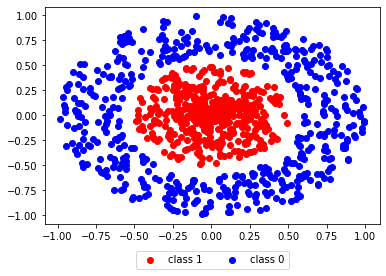

In [ ]:
np.random.seed(0)

def generate_dataset(N_points):
    # 1 classe
    radiuses = np.random.uniform(0, 0.5, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_1 = np.concatenate((x_1, x_2), axis=1)
    Y_class_1 = np.full((N_points//2,), 1)
        
    # 0 classe
    radiuses = np.random.uniform(0.6, 1, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_0 = np.concatenate((x_1, x_2), axis=1)
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y
    
N_points = 1000
X, Y = generate_dataset(N_points)

plt.scatter(X[:N_points//2, 0], X[:N_points//2, 1], color='red', label='class 1') 
plt.scatter(X[N_points//2:, 0], X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()


In [ ]:
weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}

def forward_propagation(X, weights):    
   
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)    
    return Y, Z2, H, Z1

In [ ]:
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/N_points) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y))
    
    dLdY = 1/N_points * np.divide(Y - Y_T, np.multiply(Y, 1-Y))
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.dot(dLdZ2.T, np.ones(N_points))
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 3))
    dLdZ1 = np.multiply(dLdH, np.multiply(sigmoid(Z1), (1-sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L

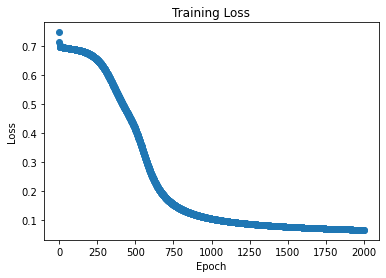

In [ ]:
epochs = 2000
epsilon = 1
initial_weights = copy.deepcopy(weights)
    
losses = []
for epoch in range(epochs):
    gradients, L = back_propagation(X, Y, weights)
    for weight_name in weights:
        weights[weight_name] -= epsilon * gradients[weight_name]
        
    losses.append(L)
    
plt.scatter(range(epochs), losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
def visualization(weights, X_data, title, superposed_training=False):
    N_test_points = 1000
    xs = np.linspace(1.1*np.min(X_data), 1.1*np.max(X_data), N_test_points)
    datapoints = np.transpose([np.tile(xs, len(xs)), np.repeat(xs, len(xs))])
    Y_initial = forward_propagation(datapoints, weights)[0].reshape(N_test_points, N_test_points)
    X1, X2 = np.meshgrid(xs, xs)
    plt.pcolormesh(X1, X2, Y_initial)
    plt.colorbar(label='P(1)')
    if superposed_training:
        plt.scatter(X_data[:N_points//2, 0], X_data[:N_points//2, 1], color='red') 
        plt.scatter(X_data[N_points//2:, 0], X_data[N_points//2:, 1], color='blue') 
    plt.title(title)
    plt.show()

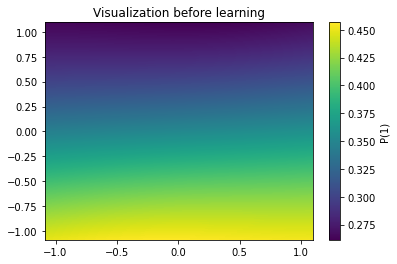

In [ ]:
visualization(initial_weights, X,  'Visualization before learning')

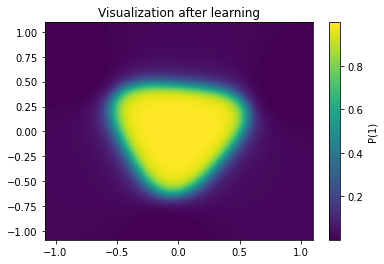

In [ ]:
visualization(weights, X, 'Visualization after learning')

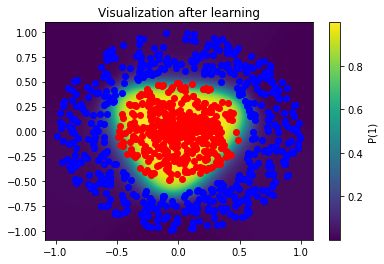

In [ ]:
visualization(weights, X, 'Visualization after learning', superposed_training=True)

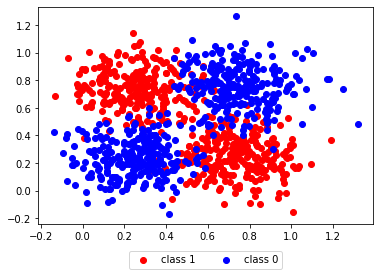

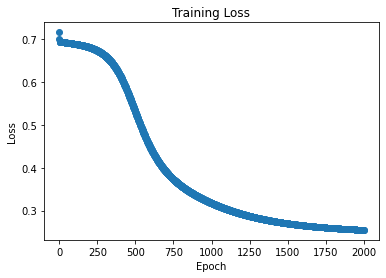

In [ ]:
def generate_xor_like_dataset(N_points):
    # 1 class
    X_class_1 = np.concatenate(
        (np.concatenate(
            (np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1),
        np.concatenate(
            (np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1))
    )
    Y_class_1 = np.full((N_points//2,), 1)
        
    # 0 class
    X_class_0 = np.concatenate(
        (np.concatenate(
            (np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1),
        np.concatenate(
            (np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1), 
             np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1)), 
            axis=1))
    )
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y
    
xor_X, xor_Y = generate_xor_like_dataset(N_points)

plt.scatter(xor_X[:N_points//2, 0], xor_X[:N_points//2, 1], color='red', label='class 1') 
plt.scatter(xor_X[N_points//2:, 0], xor_X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

xor_weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
xor_initial_weights = copy.deepcopy(xor_weights)
xor_losses = []
for epoch in range(epochs):
    gradients, L = back_propagation(xor_X, xor_Y, xor_weights)
    for weight_name in xor_weights:
        xor_weights[weight_name] -= epsilon * gradients[weight_name]
        
    xor_losses.append(L)
    
plt.scatter(range(epochs), xor_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


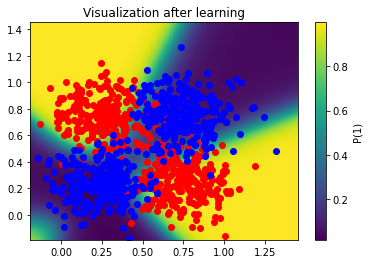

In [ ]:
visualization(xor_weights, xor_X, 'Visualization after learning', superposed_training=True)